<a href="https://colab.research.google.com/github/anuarsantoyo/master-thesis/blob/master/220525_model_optimization_RandomWalk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 master-thesisInput:
- True Observations
- Number Training Steps

Output:
- New Model Parameter

Parts of Optimization:
- Initialization of Model Parameter
- tbd

# Initialization

## Import Libraries and Mount Drive

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import torch
from torch import distributions, optim

In [2]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/GitHub/master-thesis

import sys
sys.path.append('/content/gdrive/My Drive/GitHub/master-thesis')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/GitHub/master-thesis


In [3]:
#%cd ..

In [4]:
from model.methods import *
from model.modelcore import epid_model
from model.modelhelper import *

## Optimization Settings

In [5]:
observation = 'hospitalization' #'newly_infected' #'hospitalization'
rolling_avg_obs = 2
# Overall Time Period
start_time='2020-07-31' # Mitte November/ Anfang Dezember bis Februar
end_time='2021-02-01' # Begin Vaccination Wave


train_test_split_time='2020-12-01'


dtype = torch.float32
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu") #cuda:0

## Initialize Observations

In [6]:
df_obs_initial = pd.read_csv('data/220309_observations.csv' , sep=';', thousands='.', decimal=',', encoding='utf-8', parse_dates=['Date'])

# Initialize Observations Training
df_obs_train, initial_newly_infected = initialize_observations(df_obs_initial, start=start_time, end=train_test_split_time, rolling_avg=rolling_avg_obs)
observed_train = torch.tensor(df_obs_train[observation], requires_grad=False, device=device, dtype=dtype)

# Initialize Observations Testing
df_obs_test, _ = initialize_observations(df_obs_initial, start=train_test_split_time, end=end_time, rolling_avg=rolling_avg_obs)
observed_test = torch.tensor(df_obs_test[observation], requires_grad=False, device=device, dtype=dtype)

# Create df_obs
observed_train_test = torch.concat((observed_train, observed_test))
df_obs = pd.concat([df_obs_train, df_obs_test])
df_obs = df_obs.reset_index(drop=True)
df_obs.head(3)

,Date,number_of_deaths,newly_infected,hospitalization
0,2020-07-31,0.5,71.0,4.0
1,2020-08-01,0.5,61.0,3.5
2,2020-08-02,0.0,71.0,3.0


In [7]:
#for column in df_obs.columns:
#  plt.plot(df_obs['Date'], df_obs[column])
#  plt.title(column)
#  plt.show()

## Initialize Model Parameter

### Initialize helper parameter

In [8]:
cero = torch.tensor(0., requires_grad=False, device=device, dtype=dtype)
pop = 5824857 - df_obs_initial[df_obs_initial.Date < start_time]['newly_infected'].sum()
population = torch.tensor(int(pop), requires_grad=False, device=device, dtype=dtype)

### Initialize method parameter

In [9]:
method = RandomWalk(n_observations = df_obs.shape[0], device=device, dtype=dtype)

### Initialize alpha and phi

In [10]:
dict_param = initialize_parameter(['alpha', 'phi'], device, dtype)
dict_param

{'prime_values': {'alpha': tensor(-0.0746, requires_grad=True),
  'phi': tensor(-0., requires_grad=True)},
 'real_values': {'alpha': tensor(0.0100, grad_fn=<AddBackward0>),
  'phi': tensor(25., grad_fn=<AddBackward0>)}}

## Load Method Input Data

In [11]:
#method.set_cluster_train(start_time, train_test_split_time)
#method.set_cluster_test(train_test_split_time, end_time)
#cluster_percentage_train_test = np.concatenate((method.cluster_percentage_train, method.cluster_percentage_test), axis=None)

In [12]:
#method.cluster_percentage_test.shape

# Optimization

## Training

Step: 0, Learning Rate: 0.00999 Time: 0.2961, Training Comparison Loss: 24677490.0, Test Comparison Loss: 12312.724609375, Phi: 25.0 


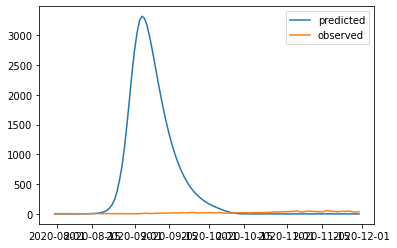

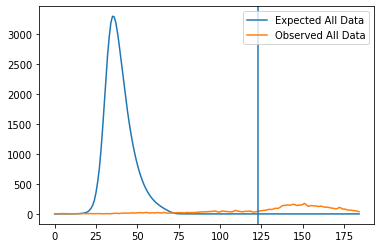

Step: 50, Learning Rate: 0.00950254422568834 Time: 0.2491, Training Comparison Loss: 415729.28125, Test Comparison Loss: 12312.724609375, Phi: 24.955066680908203 
Step: 100, Learning Rate: 0.009038873549665948 Time: 0.0963, Training Comparison Loss: 250587.546875, Test Comparison Loss: 12312.26171875, Phi: 24.94462013244629 


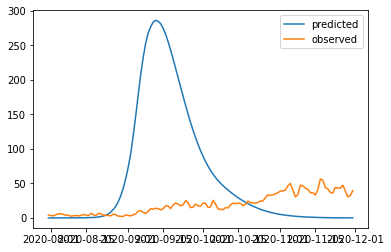

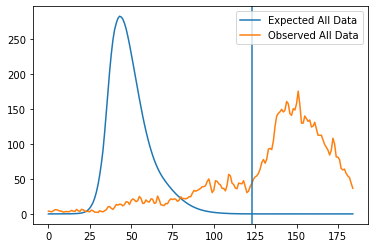

Step: 150, Learning Rate: 0.008597827393003531 Time: 0.0972, Training Comparison Loss: 132476.84375, Test Comparison Loss: 12312.724609375, Phi: 24.93783187866211 
Step: 200, Learning Rate: 0.008178301806491574 Time: 0.103, Training Comparison Loss: 100904.734375, Test Comparison Loss: 12312.439453125, Phi: 24.933094024658203 


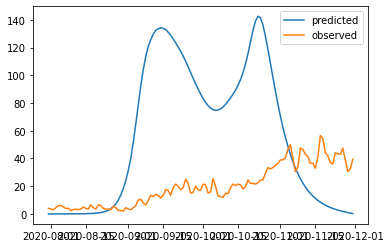

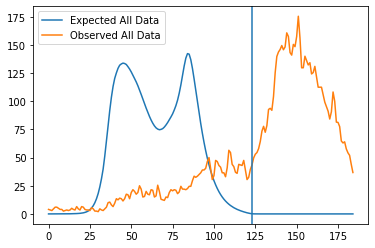

Step: 250, Learning Rate: 0.00777924670742873 Time: 0.1062, Training Comparison Loss: 76434.1171875, Test Comparison Loss: 12294.2060546875, Phi: 24.92914390563965 
Step: 300, Learning Rate: 0.007399663251239432 Time: 0.1099, Training Comparison Loss: 52211.8828125, Test Comparison Loss: 12123.9775390625, Phi: 24.926034927368164 


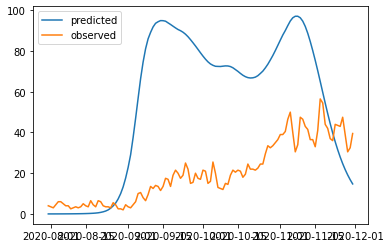

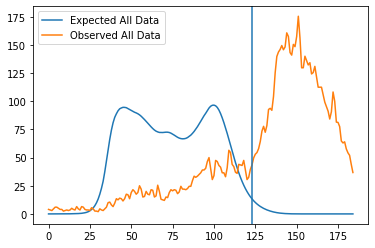

Step: 350, Learning Rate: 0.007038601331341688 Time: 0.1067, Training Comparison Loss: 33383.70703125, Test Comparison Loss: 11300.849609375, Phi: 24.923866271972656 
Step: 400, Learning Rate: 0.006695157201007331 Time: 0.1044, Training Comparison Loss: 15292.693359375, Test Comparison Loss: 8872.8330078125, Phi: 24.922496795654297 


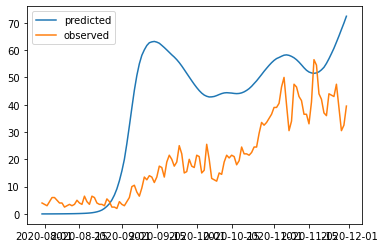

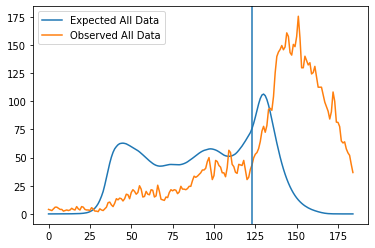

Step: 450, Learning Rate: 0.006368471211262053 Time: 0.1523, Training Comparison Loss: 3991.861328125, Test Comparison Loss: 7416.73046875, Phi: 24.921945571899414 
Step: 500, Learning Rate: 0.006057725659163231 Time: 0.1013, Training Comparison Loss: 1733.2647705078125, Test Comparison Loss: 6061.80224609375, Phi: 24.921781539916992 


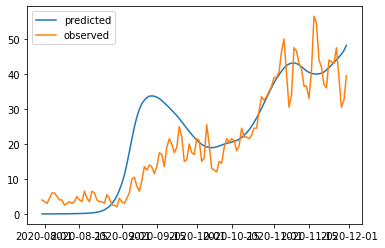

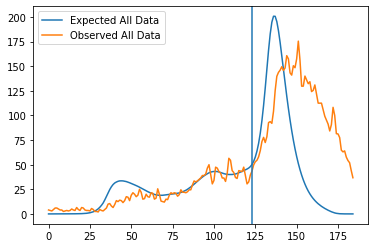

Step: 550, Learning Rate: 0.0057621427410696376 Time: 0.1133, Training Comparison Loss: 1154.3858642578125, Test Comparison Loss: 4903.37939453125, Phi: 24.92169952392578 
Step: 600, Learning Rate: 0.005480982605780108 Time: 0.1071, Training Comparison Loss: 920.9520263671875, Test Comparison Loss: 4071.04052734375, Phi: 24.921646118164062 


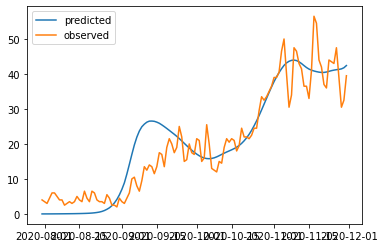

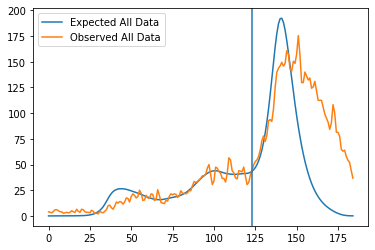

Step: 650, Learning Rate: 0.005213541502668067 Time: 0.1155, Training Comparison Loss: 799.1768188476562, Test Comparison Loss: 3469.02685546875, Phi: 24.921598434448242 
Step: 700, Learning Rate: 0.004959150020176671 Time: 0.1155, Training Comparison Loss: 724.8727416992188, Test Comparison Loss: 3025.274658203125, Phi: 24.92155647277832 


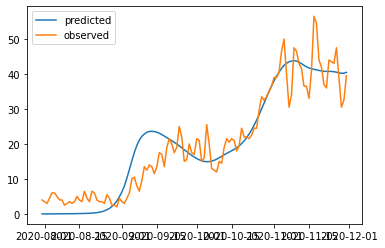

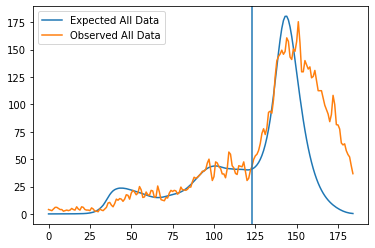

Step: 750, Learning Rate: 0.004717171410265472 Time: 0.0984, Training Comparison Loss: 674.7119750976562, Test Comparison Loss: 2695.087158203125, Phi: 24.92152214050293 
Step: 800, Learning Rate: 0.004486999994614646 Time: 0.1059, Training Comparison Loss: 638.5017700195312, Test Comparison Loss: 2449.918701171875, Phi: 24.921485900878906 


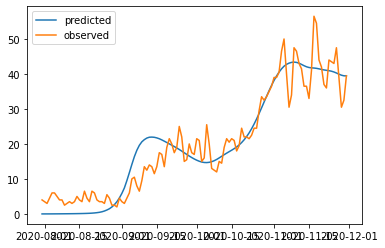

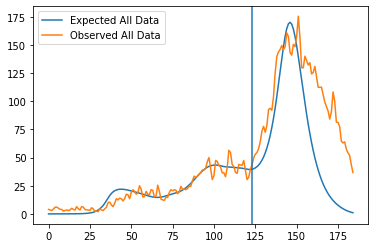

Step: 850, Learning Rate: 0.004268059648597501 Time: 0.103, Training Comparison Loss: 611.1290893554688, Test Comparison Loss: 2270.30322265625, Phi: 24.921449661254883 
Step: 900, Learning Rate: 0.0040598023592265855 Time: 0.1569, Training Comparison Loss: 589.7359619140625, Test Comparison Loss: 2142.195068359375, Phi: 24.92142105102539 


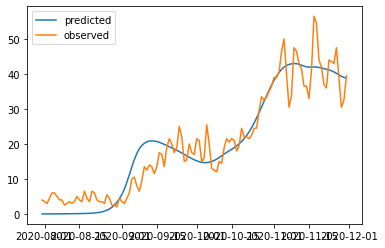

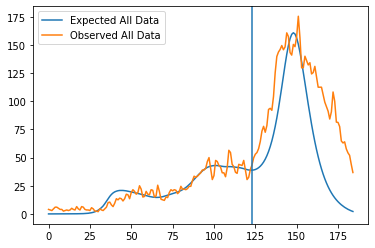

Step: 950, Learning Rate: 0.0038617068534639145 Time: 0.0968, Training Comparison Loss: 572.5844116210938, Test Comparison Loss: 2055.102294921875, Phi: 24.921390533447266 


In [13]:
from torch.optim.lr_scheduler import ExponentialLR

epochs = 1000
# model_parameter = [dict_param['prime_values']['alpha'], dict_param['prime_values']['phi']] + [dict_param['prime_values']['epsilon']]

params_to_be_optimized = method.get_parameters() + [dict_param['prime_values']['phi']]
if observation == 'hospitalization':
  params_to_be_optimized = params_to_be_optimized + [dict_param['prime_values']['alpha']]

optimizer = optim.Adam(params_to_be_optimized, lr=0.01)
scheduler = ExponentialLR(optimizer, gamma=0.999)

for i in range(epochs):
  iteration_time = time.time()
  optimizer.zero_grad()

  # transform alphi, phi
  dict_param = transform_prime_variables(dict_param)

  # forward pass
  expected = epid_model(population, R=method.calculate_R(), initial_newly_infected = initial_newly_infected, alpha=dict_param['real_values']['alpha'], device=device, dtype=dtype)[observation][:df_obs_train.shape[0]] #method.cluster_percentage_train
  
  # calc loss
  comparison_loss_train =  calc_mse(expected, observed_train) * dict_param['real_values']['phi']
  method_loss = method.calculate_loss()
  model_param_loss = calc_prior_loss(dict_param, device, dtype)
  loss = comparison_loss_train + method_loss + model_param_loss

  # backward pass
  loss.backward()
  optimizer.step()
  scheduler.step()
  
  
  with torch.no_grad():
    if i % 50==0:
        current_time = round((time.time() - iteration_time),4)
        current_lr = optimizer.state_dict()['param_groups'][0]['lr']
        expected_test = epid_model(population, R=method.calculate_R(), initial_newly_infected = initial_newly_infected, alpha=dict_param['real_values']['alpha'], device=device, dtype=dtype)[observation][-df_obs_test.shape[0]:] #method.cluster_percentage_test
        print(f"Step: {i}, Learning Rate: {current_lr} Time: {current_time}, Training Comparison Loss: {comparison_loss_train}, Test Comparison Loss: {calc_mse(expected_test, observed_test)}, Phi: {dict_param['real_values']['phi']} ")
        #plt.plot(df_obs_train['Date'], method.calculate_R(method.cluster_percentage_train).cpu().detach().numpy(), label='R')
        #plt.plot(df_obs_train['Date'], method.cluster_percentage_train, label='cluster')
        #plt.legend()
        #plt.show()
    if i % 100==0:
      #print(method.calculate_R(cluster_percentage))
      plt.plot(df_obs_train['Date'], expected.cpu().detach().numpy(), label='predicted')
      plt.plot(df_obs_train['Date'], observed_train.cpu().detach().numpy(), label='observed')
      plt.legend()
      plt.show()

      expected_train_test = epid_model(population, R=method.calculate_R(), initial_newly_infected = initial_newly_infected, alpha=dict_param['real_values']['alpha'], device=device, dtype=dtype)[observation] #cluster_percentage_train_test
      plt.plot(expected_train_test.cpu().detach().numpy(),label='Expected All Data')
      plt.plot(observed_train_test.cpu().detach().numpy(),label='Observed All Data')
      plt.axvline(x=observed_train.shape[0])
      plt.legend()
      plt.show()


# Evaluation

## Train and Test Time 

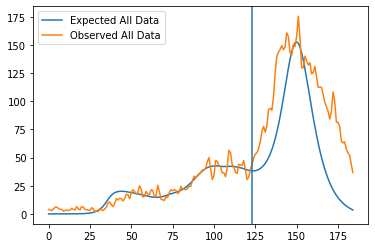

In [14]:
expected_train_test = epid_model(population, R=method.calculate_R(), initial_newly_infected = initial_newly_infected, alpha=dict_param['real_values']['alpha'], device=device, dtype=dtype)[observation] #cluster_percentage_train_test
plt.plot(expected_train_test.cpu().detach().numpy(),label='Expected All Data')
plt.plot(observed_train_test.cpu().detach().numpy(),label='Observed All Data')
plt.axvline(x=observed_train.shape[0])
plt.legend()
plt.show()

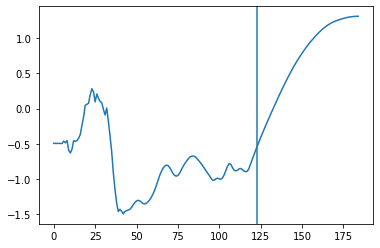

In [19]:
plt.plot(method.get_parameters()[0].cpu().detach().numpy())
plt.axvline(x=observed_train.shape[0])
plt.show()

In [ ]:
# Plot R-Value & Cluster Percentage
plt.plot(df_obs['Date'], method.calculate_R(cluster_percentage_train_test).cpu().detach().numpy(), label='R')
plt.plot(df_obs['Date'], cluster_percentage_train_test, label='cluster')
plt.legend()
plt.show()

## Eval on Test Data


In [ ]:
expected_test = expected_train_test[-df_obs_test.shape[0]:]
comparison_loss_test = calc_mse(expected_test, observed_test) * dict_param['real_values']['phi']
print(f'Comparison Loss Train: {comparison_loss_train} - Comparison Loss Test: {comparison_loss_test}')

plt.plot(df_obs_test['Date'], expected_test.cpu().detach().numpy(),label='Expected Test Data')
plt.plot(df_obs_test['Date'], observed_test.cpu().detach().numpy(),label='Observed Test Data')
plt.legend()
plt.show()

In [ ]:
# Plot R-Value & Cluster Percentage
plt.plot(df_obs_test['Date'], method.calculate_R(method.cluster_percentage_test).cpu().detach().numpy(), label='R')
plt.plot(df_obs_test['Date'], method.cluster_percentage_test, label='cluster')
plt.legend()
plt.show()

## Eval What IF

In [ ]:
expected_normal = epid_model(population, R=method.calculate_R(cluster_percentage_train_test), initial_newly_infected = initial_newly_infected, alpha=dict_param['real_values']['alpha'], device=device, dtype=dtype)[observation]
expected_careful= epid_model(population, R=method.calculate_R(cluster_percentage_train_test*1.1), initial_newly_infected = initial_newly_infected, alpha=dict_param['real_values']['alpha'], device=device, dtype=dtype)[observation]
expected_crazy = epid_model(population, R=method.calculate_R(cluster_percentage_train_test*0.9), initial_newly_infected = initial_newly_infected, alpha=dict_param['real_values']['alpha'], device=device, dtype=dtype)[observation]

plt.plot(expected_normal.cpu().detach().numpy(),label='normal')
plt.plot(expected_careful.cpu().detach().numpy(),label='careful')
plt.plot(expected_crazy.cpu().detach().numpy(),label='CRAZY!!')
plt.axvline(x=observed_train.shape[0])
plt.legend()
plt.show()

## Eval Cluster Percentage vs R-Value

In [ ]:
from scipy import stats

x = np.arange(0,1 , 0.01)
y = np.squeeze(method.calculate_R(x).cpu().detach().numpy())


x_min = cluster_percentage_train_test.min()
x_max = cluster_percentage_train_test.max()
x_bound = np.arange(x_min, x_max + 0.01 , 0.01)
y_bound = np.squeeze(method.calculate_R(x_bound).cpu().detach().numpy())

slope, intercept, r_value, p_value, std_err = stats.linregress(x_bound, y_bound)
y_linreg = intercept + slope * x_bound
print(f'Slope: {slope}, intercept: {intercept}, r-squared: {r_value**2}')
plt.plot(x, y, label='actual values')
plt.plot(x_bound, y_linreg, label='linear regression')
plt.axvline(x=x_min, c='r', linestyle='--')
plt.axvline(x=x_max, c='r', linestyle='--')
plt.xlabel('Cluster percentage')
plt.ylabel('R Value')
plt.title('Cluster percentage and R Value')
plt.legend()
plt.show()

Eval Newly Infected

In [ ]:
expected_newly = epid_model(population, R=method.calculate_R(cluster_percentage_train_test), initial_newly_infected = initial_newly_infected, alpha=dict_param['real_values']['alpha'], device=device, dtype=dtype)['newly_infected']

plt.plot(expected_newly.cpu().detach().numpy(),label='Expected Newly Infected')
plt.plot(df_obs['newly_infected'],label='Observed Newly Infected')
plt.axvline(x=observed_train.shape[0])
plt.legend()
plt.show()